In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# 함수 구현
def f(z):
    return np.square(z) - 1

In [4]:
# 복소수 집합 생성
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + 1j * y

In [5]:
def divergence_rate(mesh, num_iter=10, radius=2):
    z = mesh.copy()
    diverge_len = np.zeros(mesh.shape, dtype=int)

    for i in range(num_iter):
        # 1. Boolean 배열 마스크 생성
        conv_mask = np.abs(z) < radius
        
        # 2. 해당 값들에 대한 diverge_len 값 증가
        diverge_len += conv_mask.astype(int)
        
        # 3. 해당 값들에 대해 함수 적용
        z[conv_mask] = f(z[conv_mask])

    return diverge_len

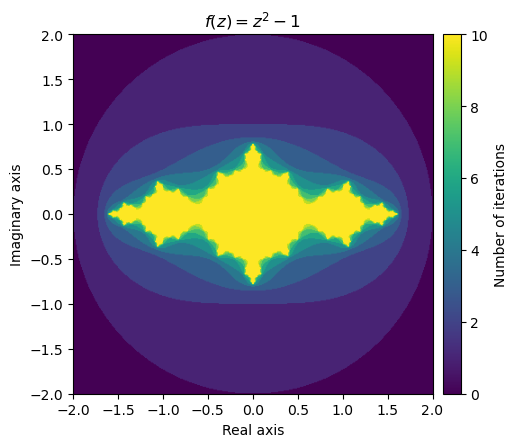

In [6]:
# 결과 계산 및 시각화
output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2-1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations')

plt.show()